In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# SMA strategy
def sma(short, long):
    df["short_day"] = round (df['adjClose'].rolling(short).mean(),1)
    df["long_day"] = round(df['adjClose'].rolling(long).mean(),1)
    return df

In [3]:
# import data
df = pd.read_csv("https://webb-site.com/dbpub/pricesCSV.asp?i=5295", index_col = 0, parse_dates = True)
df.head()

,settleDate,susp,closing,bid,ask,low,high,vol,turn,VWAP,adjClose,adjBid,adjAsk,adjLow,adjHigh,adjVol,adjVWAP,totalRet
atDate,,,,,,,,,,,,,,,,,,
2020-09-25,2020-09-29,0,24.06,24.04,24.06,23.90,24.28,77083932,1857078039,24.091636,24.06,24.04,24.06,23.90,24.28,77083932,24.09164,-0.00249
2020-09-24,2020-09-28,0,24.12,24.10,24.12,23.98,24.36,134397017,3243287942,24.132142,24.12,24.10,24.12,23.98,24.36,134397017,24.13214,-0.01631
2020-09-23,2020-09-25,0,24.52,24.50,24.52,24.32,24.58,91849416,2247605196,24.470544,24.52,24.50,24.52,24.32,24.58,91849416,24.47054,0.00082
2020-09-22,2020-09-24,0,24.50,24.48,24.50,24.44,24.68,93247378,2289984230,24.558162,24.50,24.48,24.50,24.44,24.68,93247378,24.55816,-0.00890
2020-09-21,2020-09-23,0,24.72,24.70,24.72,24.70,25.36,124941905,3116916588,24.946927,24.72,24.70,24.72,24.70,25.36,124941905,24.94693,-0.02060


In [4]:
# parameter
short, long = 50, 200
years = 15

# Clean the data
df = df[::-1]
df = round(df.iloc[-years * 252:, 10:15],3)
sma (short, long)
df["buy_sell"] = np.where(df["long_day"] > df["short_day"], 1, 0)
df["return"] = df["adjClose"].apply(np.log).diff(1)
df["strategy_return"] = df["buy_sell"] * df["return"]
df["total_return"] = np.exp(df["strategy_return"].cumsum())
df.head(15)

,adjClose,adjBid,adjAsk,adjLow,adjHigh,short_day,long_day,buy_sell,return,strategy_return,total_return
atDate,,,,,,,,,,,
2005-06-03,8.741,8.710,8.741,8.710,8.772,NaN,NaN,0,NaN,NaN,NaN
2005-06-06,8.741,8.710,8.741,8.679,8.741,NaN,NaN,0,0.000000,0.0,1.0
2005-06-07,8.741,8.710,8.741,8.710,8.741,NaN,NaN,0,0.000000,0.0,1.0
2005-06-08,8.772,8.772,8.803,8.741,8.803,NaN,NaN,0,0.003540,0.0,1.0
2005-06-09,8.772,8.772,8.803,8.772,8.835,NaN,NaN,0,0.000000,0.0,1.0
2005-06-10,8.803,8.803,8.835,8.803,8.835,NaN,NaN,0,0.003528,0.0,1.0
2005-06-13,8.803,8.803,8.835,8.772,8.835,NaN,NaN,0,0.000000,0.0,1.0
2005-06-14,8.803,8.772,8.803,8.772,8.866,NaN,NaN,0,0.000000,0.0,1.0
2005-06-15,8.803,8.772,8.803,8.772,8.835,NaN,NaN,0,0.000000,0.0,1.0


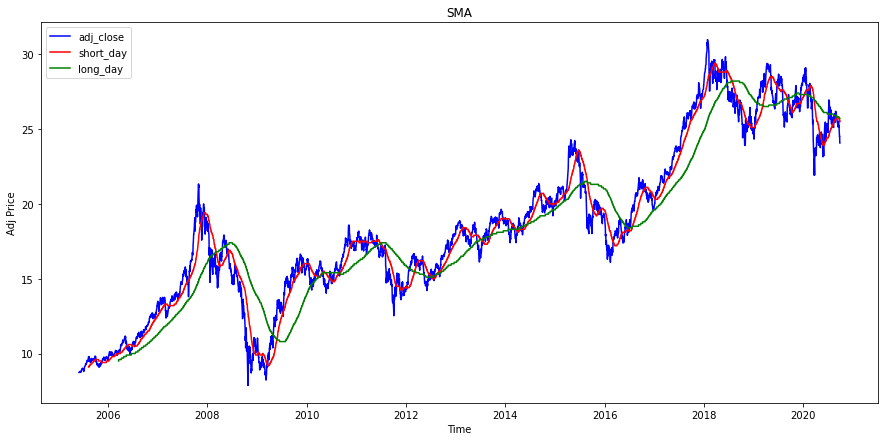

In [5]:
fig, ax = plt.subplots(figsize = (15,7))
ax.plot(df.index, df['adjClose'], c = 'b', label = "adj_close")
ax.plot(df['short_day'], c = 'r', label = "short_day")
ax.plot(df['long_day'], c = 'g', label = "long_day")
ax.set(xlabel='Time', ylabel='Adj Price', title='SMA')

plt.legend()

[Text(0, 0.5, 'SMA crossover'), Text(0.5, 1.0, 'SMA signal')]

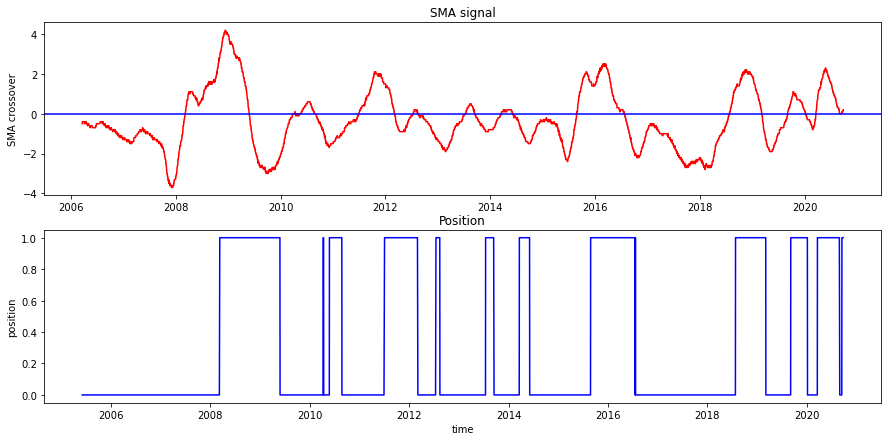

In [6]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (15,7))
ax2.plot(df.index, df['buy_sell'], c = 'b')
ax2.set(xlabel = 'time', ylabel = 'position', title = "Position")
ax1.plot(df.index, df["long_day"] -  df["short_day"], c = "r")
ax1.axhline(y=0, c = 'b')
ax1.set(ylabel='SMA crossover', title='SMA signal')

Total return of the strategy is:38.34%


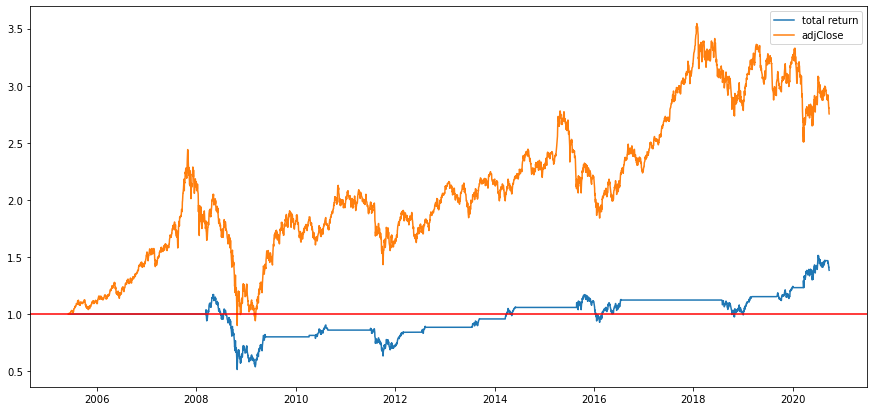

In [7]:
fig, ax = plt.subplots(figsize = (15,7))
ax.plot(df.index, df["total_return"], label = "total return")
ax.plot(df.index, df["adjClose"] / df.iloc[0,0], label = 'adjClose')
ax.axhline(y = 1, c = 'r')
plt.legend()
print ("Total return of the strategy is:" + str(round((df.iloc[-1,-1] - 1) * 100, 2)) + '%')